In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

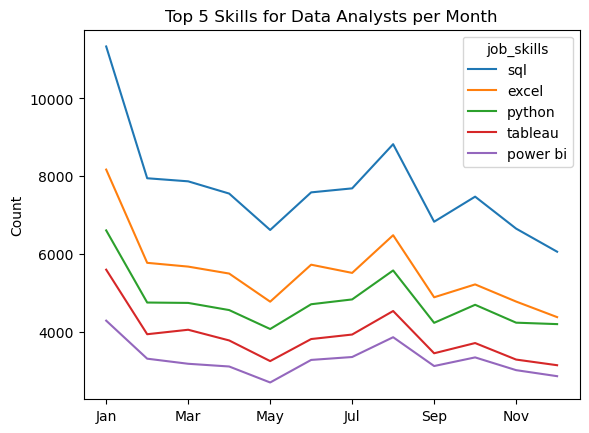

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Text(0.5, 0, '2023')

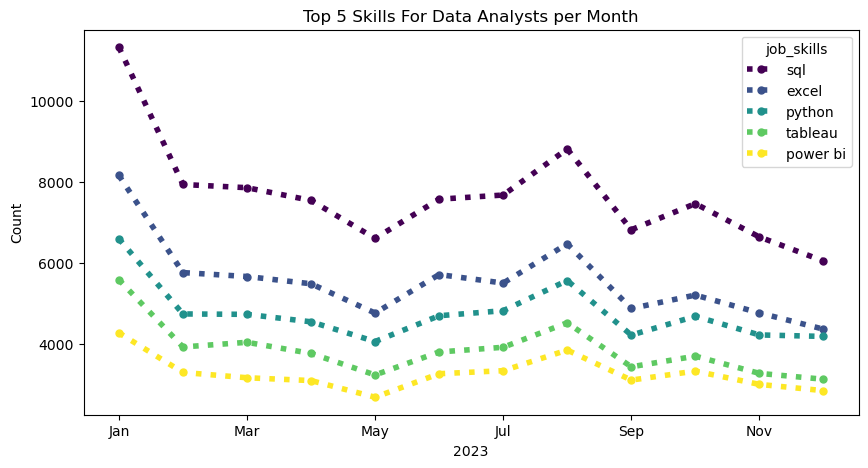

In [12]:
df_DA_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth = 4,
    linestyle = ':',
    colormap='viridis',
    marker = 'o',
    markersize = 5,
    figsize = (10,5)
)

plt.title('Top 5 Skills For Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('2023')

In [22]:
df = df[df.job_title_short == 'Data Analyst']
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skills = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skills)




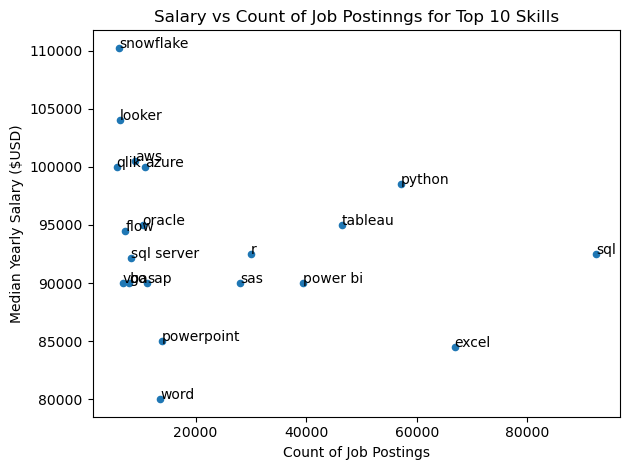

In [23]:
skill_stats.plot(kind='scatter',x = 'skill_count',y='median_salary')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.title('Salary vs Count of Job Postinngs for Top 10 Skills')
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)
    
plt.tight_layout()